# Prueba Profesional III Analítica y transformación Operación

## Análisis Situaciones de Cobranza

In [ ]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

# Datos iniciales
saldo_actual = {
    "0_30": 100_000_000,
    "31_60": 30_000_000,
    "61_90": 10_000_000,
    "90_plus": 5_000_000
}

# Porcentajes de rodamiento relativo
rodamiento = {
    "0_30_to_31_60": 0.06,
    "31_60_to_61_90": 0.51,
    "61_90_to_90_plus": 0.73
}

# Porcentajes de recaudo
recaudo = {
    "menos_90": 0.10,
    "90_plus": 0.01
}

# Porcentaje de Pérdida Esperada
perdida_esperada = {
    "0_30": 0.04,   # 4% para 0-30 días
    "31_60": 0.15,  # 15% para 31-60 días
    "61_90": 0.35,  # 35% para 61-90 días
    "90_plus": 0.85 # 85% para 90+ días
}

# Inicializar resultados
resultados = {"Agosto": {}, "Septiembre": {}, "Octubre": {}, "Noviembre": {}, "Diciembre": {}}
provision = {"Agosto": {}, "Septiembre": {}, "Octubre": {}, "Noviembre": {}, "Diciembre": {}}

# Proyección mes a mes
for mes in resultados:
    # Cálculo de nuevos saldos
    rodado_0_30_a_31_60 = saldo_actual["0_30"] * rodamiento["0_30_to_31_60"]
    recaudado_0_30 = (saldo_actual["0_30"] - rodado_0_30_a_31_60) * recaudo["menos_90"]
    nuevo_0_30 = saldo_actual["0_30"] - rodado_0_30_a_31_60 - recaudado_0_30

    rodado_31_60_a_61_90 = saldo_actual["31_60"] * rodamiento["31_60_to_61_90"]
    recaudado_31_60 = (saldo_actual["31_60"] - rodado_31_60_a_61_90) * recaudo["menos_90"]
    nuevo_31_60 = saldo_actual["31_60"] - rodado_31_60_a_61_90 + rodado_0_30_a_31_60 - recaudado_31_60

    rodado_61_90_a_90_plus = saldo_actual["61_90"] * rodamiento["61_90_to_90_plus"]
    recaudado_61_90 = (saldo_actual["61_90"] - rodado_61_90_a_90_plus) * recaudo["menos_90"]
    nuevo_61_90 = saldo_actual["61_90"] - rodado_61_90_a_90_plus + rodado_31_60_a_61_90 - recaudado_61_90

    recaudado_90_plus = saldo_actual["90_plus"] * recaudo["90_plus"]
    nuevo_90_plus = saldo_actual["90_plus"] - recaudado_90_plus + rodado_61_90_a_90_plus

    # Guardar resultados del mes
    resultados[mes] = {
        "0_30": nuevo_0_30,
        "31_60": nuevo_31_60,
        "61_90": nuevo_61_90,
        "90_plus": nuevo_90_plus
    }

    # Cálculo de la provisión (pérdida esperada)
    provision[mes] = {
        "0_30": nuevo_0_30 * perdida_esperada["0_30"],
        "31_60": nuevo_31_60 * perdida_esperada["31_60"],
        "61_90": nuevo_61_90 * perdida_esperada["61_90"],
        "90_plus": nuevo_90_plus * perdida_esperada["90_plus"]
    }

    # Actualizar saldos para el siguiente mes
    saldo_actual = {
        "0_30": nuevo_0_30,
        "31_60": nuevo_31_60,
        "61_90": nuevo_61_90,
        "90_plus": nuevo_90_plus
    }

# Crear DataFrame de resultados
resultados_df = pd.DataFrame(resultados)
provision_df = pd.DataFrame(provision)

In [ ]:
# Mostrar resultados
resultados_df

,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0_30,84600000.00,71571600.00,60549573.60,51224939.27,43336298.62
31_60,19230000.00,13556430.00,10272681.63,8163227.01,6673479.47
61_90,17730000.00,14115690.00,10343891.97,7752633.38,6047135.69
90_plus,12250000.00,25070400.00,35124149.70,42323949.34,47560132.22


In [ ]:
provision_df

,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0_30,3384000.00,2862864.00,2421982.94,2048997.57,1733451.94
31_60,2884500.00,2033464.50,1540902.24,1224484.05,1001021.92
61_90,6205500.00,4940491.50,3620362.19,2713421.68,2116497.49
90_plus,10412500.00,21309840.00,29855527.25,35975356.94,40426112.38


In [ ]:
import itertools
#pd.set_option('display.float_format', '{:.0f}'.format)
# Datos iniciales
saldos = {
    "0-30": 100_000_000,
    "31-60": 30_000_000,
    "61-90": 10_000_000,
    "90+": 5_000_000,
}

perdidas_esperadas = {
    "0-30": 0.04,
    "31-60": 0.15,
    "61-90": 0.35,
    "90+": 0.85,
}

rodamientos = {
    "0-30": 0.06,
    "31-60": 0.51,
    "61-90": 0.73,
    "90+": 0
}

alternativas = {
    "A1": {"ganancia": 0.20, "sacrificio_tasa": 0.10, "costo_gestion": 0.20},
    "A2": {"ganancia": 0.15, "sacrificio_tasa": 0.40, "costo_gestion": 0.05},
    "Ninguna": {"ganancia": 0.0, "sacrificio_tasa": 0.0, "costo_gestion": 0.0},
}

# Generar combinaciones
segmentos = list(saldos.keys())
opciones = list(alternativas.keys())
combinaciones = list(itertools.product(opciones, repeat=len(segmentos)))

#print(combinacion)

def e_combinacion(combinacion):
  ganancias_netas_segmento = {}
  ganancias_netas_totales = 0
  for i,segmento in enumerate(segmentos):
      alternativa = combinacion[i]
      saldo = saldos[segmento]
      perdida_esperada = perdidas_esperadas[segmento]
      rodamiento = rodamientos[segmento]
      datos_alt = alternativas[alternativa]

      saldo_que_rueda = saldo * rodamiento
      saldo_que_no_rueda = saldo - saldo_que_rueda

      ingreso_por_intereses = saldo_que_no_rueda * 0.05 if i < 3 else 0
      sacrificio_de_ingreso_por_intereses = ingreso_por_intereses * datos_alt['sacrificio_tasa']

      provision_inicial = saldo * perdida_esperada
      reduccion_perdida_esperada = provision_inicial * (1 - datos_alt['ganancia'])

      costo_gestion = saldo_que_rueda * datos_alt['costo_gestion'] if i < 3 else saldo * datos_alt['costo_gestion']
      #print(segmento,saldo_que_rueda,saldo_que_no_rueda,costo_gestion)
      #print(segmento, ingreso_por_intereses, reduccion_perdida_esperada, sacrificio_de_ingreso_por_intereses, costo_gestion)
      ganancia_neta = ingreso_por_intereses - reduccion_perdida_esperada - sacrificio_de_ingreso_por_intereses - costo_gestion

      ganancias_netas_segmento[segmento] = ganancia_neta
      ganancias_netas_totales+=ganancia_neta

  #print(combinacion)
  #print(ganancias_netas_segmento)
  return ganancias_netas_totales


# Encontrar la mejor combinación
mejor_combinacion = max(combinaciones, key=e_combinacion)
mejor_resultado = e_combinacion(mejor_combinacion)
x = -900000000000000000000000000
for combinacion in combinaciones:
 #print(e_combinacion(combinacion))
 if e_combinacion(combinacion) > x:
    x = e_combinacion(combinacion)

print(x)

print("Mejor combinación:", mejor_combinacion)
print("Mejor resultado financiero:", mejor_resultado)

-10186500.0
Mejor combinación: ('Ninguna', 'Ninguna', 'A2', 'A2')
Mejor resultado financiero: -10186500.0


In [ ]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Datos iniciales
saldos = {
    "0-30": 100_000_000,
    "31-60": 30_000_000,
    "61-90": 10_000_000,
    "90+": 5_000_000,
}

perdidas_esperadas = {
    "0-30": 0.04,
    "31-60": 0.15,
    "61-90": 0.35,
    "90+": 0.85,
}

rodamientos = {
    "0-30": 0.06,
    "31-60": 0.51,
    "61-90": 0.73,
    "90+": 0
}

alternativas = {
    "A1": {"ganancia": 0.20, "sacrificio_tasa": 0.10, "costo_gestion": 0.20},
    "A2": {"ganancia": 0.15, "sacrificio_tasa": 0.40, "costo_gestion": 0.05},
    "Ninguna": {"ganancia": 0.0, "sacrificio_tasa": 0.0, "costo_gestion": 0.0},
}

# Crear el modelo de optimización
model = LpProblem(name="maximizar-ganancias", sense=LpMaximize)

# Variables de decisión: si se selecciona una alternativa para un segmento
variables = {
    (segmento, alternativa): LpVariable(name=f"x_{segmento}_{alternativa}", cat="Binary")
    for segmento in saldos.keys()
    for alternativa in alternativas.keys()
}

# Restricción: una sola alternativa por segmento
for segmento in saldos.keys():
    model += lpSum(variables[(segmento, alternativa)] for alternativa in alternativas.keys()) == 1, f"una_alternativa_{segmento}"

# Función objetivo: maximizar las ganancias netas
def calcular_ganancia(segmento, alternativa):
    saldo = saldos[segmento]
    perdida_esperada = perdidas_esperadas[segmento]
    rodamiento = rodamientos[segmento]
    datos_alt = alternativas[alternativa]

    saldo_que_rueda = saldo * rodamiento
    saldo_que_no_rueda = saldo - saldo_que_rueda

    ingreso_por_intereses = saldo_que_no_rueda * 0.05 if segmento != "90+" else 0
    sacrificio_de_ingreso_por_intereses = ingreso_por_intereses * datos_alt['sacrificio_tasa']

    provision_inicial = saldo * perdida_esperada
    reduccion_perdida_esperada = provision_inicial * (1 - datos_alt['ganancia'])

    costo_gestion = saldo_que_rueda * datos_alt['costo_gestion'] if segmento != "90+" else saldo * datos_alt['costo_gestion']

    ganancia_neta = ingreso_por_intereses - reduccion_perdida_esperada - sacrificio_de_ingreso_por_intereses - costo_gestion
    return ganancia_neta

# Agregar ganancias netas a la función objetivo
model += lpSum(
    variables[(segmento, alternativa)] * calcular_ganancia(segmento, alternativa)
    for segmento in saldos.keys()
    for alternativa in alternativas.keys()
), "ganancias_totales"

# Resolver el modelo
model.solve()

# Obtener los resultados
mejor_combinacion = {
    segmento: alternativa
    for segmento in saldos.keys()
    for alternativa in alternativas.keys()
    if variables[(segmento, alternativa)].value() == 1
}

mejor_resultado = sum(
    calcular_ganancia(segmento, alternativa)
    for segmento, alternativa in mejor_combinacion.items()
)

print("Mejor combinación:", mejor_combinacion)
print("Ganancia total máxima:", mejor_resultado)


Mejor combinación: {'0-30': 'Ninguna', '31-60': 'Ninguna', '61-90': 'A2', '90+': 'A2'}
Ganancia total máxima: -10186500.0


## Desarrollo y automatización

In [15]:
import pandas as pd

In [16]:
file_path = 'Guia_Excel_340 - Formato Unico.xlsx'

excel_file = pd.ExcelFile(file_path)

excel_file.sheet_names

['Disclaimer', 'Codigos', 'ABREVIATURAS']

In [17]:
disclaimer_content = excel_file.parse('Disclaimer').head()

codigos_content = excel_file.parse('Codigos').head()

abreviaturas_content = excel_file.parse('ABREVIATURAS').head()

In [18]:
codigos_data = excel_file.parse('Codigos')

In [19]:
codigos_data.head()

,Codigo,Homologocodigo,Marca,Clase,Referencia1,Referencia2,Referencia3,Um,1970,1971,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
0,101001,132001,ALEKO,AUTOMOVIL,2141,1.6,MT 1600CC TAXI,0,0,0,...,0,0,0,0,0,0,0,0,0,100600
1,208003,236001,AMERICAN MOTOR,CAMPERO,WRANGLER,4.2,MT 4200CC CAB,0,0,0,...,0,0,0,0,0,0,0,0,0,72400
2,208004,236002,AMERICAN MOTOR,CAMPERO,WRANGLER,4.2,MT 2500CC CARPADO,0,0,0,...,0,0,0,0,0,0,0,0,0,76000
3,206001,237001,AMERICAN MOTOR,CAMIONETA PASAJ.,EAGLE,SUMMIT,AT 2400CC LX 4P,0,0,0,...,0,0,0,0,0,0,0,0,0,43800
4,301001,332001,BAJAJ,AUTOMOVIL,QUTE,200,MT 200CC,0,0,0,...,0,0,0,19400,20800,22300,0,0,0,23900


Con la información contenida en la base descargada, presente en un gráfico cómo
es la curva de depreciación de su carro preferido del 2019 hasta hoy frente al
mercado de vehículos. ¿Qué supuestos está realizando al generar estas curvas?.

In [20]:
# Filtrar únicamente las columnas necesarias para analizar la depreciación
bmw_data = codigos_data[codigos_data['Codigo'] == 801426]

In [21]:
bmw_data

,Codigo,Homologocodigo,Marca,Clase,Referencia1,Referencia2,Referencia3,Um,1970,1971,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
501,801426,831055,BMW,AUTOMOVIL,Z4,[G29] sDrive 20i,TP 2000CC T,1,0,0,...,0,0,166400,169500,196300,199000,201500,222900,237100,254900


In [22]:
# Extraer los valores de los años 2019 a 2024
valores = bmw_data.loc[:, '2019':'2024'].values.flatten()

In [23]:
valores

array([166400, 169500, 196300, 199000, 201500, 222900])

In [24]:
valor_inicial = valores[0]
depreciacion = [(valor_inicial - valor_actual) / valor_inicial * 100 if valor_actual != 0 else None for valor_actual in valores]

In [25]:
for i, dep in enumerate(depreciacion):
    print(f"Año {2019 + i}: {dep:.2f}% de depreciación")

Año 2019: 0.00% de depreciación
Año 2020: -1.86% de depreciación
Año 2021: -17.97% de depreciación
Año 2022: -19.59% de depreciación
Año 2023: -21.09% de depreciación
Año 2024: -33.95% de depreciación


In [26]:
carro_especifico = codigos_data[codigos_data['Codigo'] == 801426]

años = list(range(2019, 2025))
valores_carro = carro_especifico.loc[:, map(str, años)].T.reset_index()
valores_carro.columns = ['Año', 'Valor']
valores_carro = valores_carro[valores_carro['Valor'] > 0]
valores_carro['Año'] = valores_carro['Año'].astype(int)

In [27]:
mercado = codigos_data.loc[:, map(str, años)].replace(0, pd.NA)
promedio_mercado = mercado.mean(skipna=True).reset_index()
promedio_mercado.columns = ['Año', 'Valor']
promedio_mercado['Año'] = promedio_mercado['Año'].astype(int)

In [28]:
promedio_mercado

,Año,Valor
0,2019,123081.751825
1,2020,130070.856564
2,2021,143351.961311
3,2022,150146.972459
4,2023,197407.998232
5,2024,178560.189838


In [29]:
valores_carro

,Año,Valor
0,2019,166400
1,2020,169500
2,2021,196300
3,2022,199000
4,2023,201500
5,2024,222900


In [38]:
import plotly.graph_objects as go

fig = go.Figure()

# Agregar la curva del vehículo preferido
fig.add_trace(go.Scatter(
    x=valores_carro['Año'],
    y=valores_carro['Valor'],
    mode='lines+markers',
    name=f"Depreciación de BMW",
    line=dict(color='blue', width=3),
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    x=promedio_mercado['Año'],
    y=promedio_mercado['Valor'],
    mode='lines+markers',
    name="Promedio del mercado",
    line=dict(color='orange', width=3, dash='dash'),
    marker=dict(size=6)
))


fig.show()

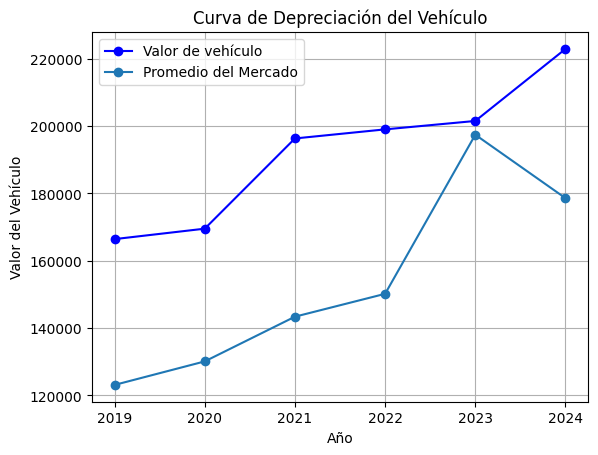

In [ ]:
import matplotlib.pyplot as plt

plt.plot(valores_carro['Año'], valores_carro['Valor'], marker='o', color='b', label='Valor de vehículo')
plt.plot(promedio_mercado['Año'], promedio_mercado['Valor'], marker='o', label='Promedio del Mercado')
plt.title('Curva de Depreciación del Vehículo')
plt.xlabel('Año')
plt.ylabel('Valor del Vehículo')
plt.xticks(promedio_mercado['Año'])
plt.grid(True)
plt.legend()
plt.show()

Genere un monitoreo de las curvas de depreciación de las distintas marcas
de automóviles del mercado colombiano? ¿Las podría descomponer por
año?

In [47]:
años = list(range(1970, 2027))

In [48]:
codigos_data.iloc[:, codigos_data.columns.get_loc('1970'):].replace(0, pd.NA, inplace=True)

In [49]:
codigos_data.head()

,Codigo,Homologocodigo,Marca,Clase,Referencia1,Referencia2,Referencia3,Um,1970,1971,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
0,101001,132001,ALEKO,AUTOMOVIL,2141,1.6,MT 1600CC TAXI,0,0,0,...,0,0,0,0,0,0,0,0,0,100600
1,208003,236001,AMERICAN MOTOR,CAMPERO,WRANGLER,4.2,MT 4200CC CAB,0,0,0,...,0,0,0,0,0,0,0,0,0,72400
2,208004,236002,AMERICAN MOTOR,CAMPERO,WRANGLER,4.2,MT 2500CC CARPADO,0,0,0,...,0,0,0,0,0,0,0,0,0,76000
3,206001,237001,AMERICAN MOTOR,CAMIONETA PASAJ.,EAGLE,SUMMIT,AT 2400CC LX 4P,0,0,0,...,0,0,0,0,0,0,0,0,0,43800
4,301001,332001,BAJAJ,AUTOMOVIL,QUTE,200,MT 200CC,0,0,0,...,0,0,0,19400,20800,22300,0,0,0,23900


In [50]:
promedios_por_marca = codigos_data.groupby('Marca')[list(map(str, años))].mean()

In [51]:
promedios_por_marca.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
Marca,,,,,,,,,,,,,,,,,,,,,
ACB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3600.000000
ACURA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,85133.333333
AG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5460.000000
AGRALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38735.135135,22954.054054,24264.864865,0.0,30389.189189,0.0,0.0,0.0,0.0,143748.648649
AIMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,7275.0,0.0,0.0,0.0,8100.000000


In [44]:
promedios_por_marca_t = promedios_por_marca.T

In [56]:
import plotly.graph_objects as go

# Crear la figura
fig = go.Figure()

# Iterar sobre las columnas (marcas) y agregar trazos (líneas)
for marca in promedios_por_marca_t.columns:
    fig.add_trace(go.Scatter(
        x=promedios_por_marca_t.index,
        y=promedios_por_marca_t[marca],
        mode='lines',
        name=marca,  # El nombre aparecerá al pasar el cursor
        hoverinfo='name+y'  # Muestra solo el nombre y el valor en el tooltip
    ))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Curvas de Depreciación por Marca (1970-2026)',
    xaxis_title='Año',
    yaxis_title='Valor Promedio (en unidades)',
    showlegend=True,  # Ocultar la leyenda
    margin=dict(l=40, r=40, t=40, b=40),
    height=600,
    width=1000,
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()

In [ ]:
descomposicion_por_año = promedios_por_marca_t.reset_index()
descomposicion_por_año.columns = ['Año'] + list(promedios_por_marca_t.columns)
descomposicion_por_año.head()

,Año,ACB,ACURA,AG,AGRALE,AIMA,AKT,ALCAR,ALEKO,ALFA ROMEO,...,ZEEKR,ZERO,ZHIDOU,ZHONG TONG,ZHONGNENG,ZHONGXING,ZNA,ZONGSHEN,ZOTYE,ZQ MOTORS
0,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
codigos_data['Marca'].nunique()

445

¿Cuáles son las marcas que más se deprecian y las que menos se
deprecian?

In [ ]:
df = codigos_data.copy()
columnas_años = df.columns[df.columns.str.isdigit()]
años = list(map(int, columnas_años))

In [ ]:
df[columnas_años] = df[columnas_años].replace(0, pd.NA)

In [ ]:
def calcular_depreciacion(row):
    # Filtrar los años en los que hay datos disponibles
    años_disponibles = row[columnas_años].dropna()

    if len(años_disponibles) == 0:
        return None  # Si no hay datos, no se puede calcular la depreciación

    # Obtener el primer y el último año con datos
    primer_año = años_disponibles.index[0]
    ultimo_año = años_disponibles.index[-1]

    # Obtener los valores correspondientes a esos años
    valor_primer_año = row[primer_año]
    valor_ultimo_año = row[ultimo_año]

    # Calcular la depreciación
    depreciacion = valor_primer_año - valor_ultimo_año
    return depreciacion

In [ ]:
df['Depreciación'] = df.apply(calcular_depreciacion, axis=1)

In [ ]:
depreciacion_por_marca = df.groupby('Marca')['Depreciación'].sum()

In [ ]:
marcas_mas_depreciadas = depreciacion_por_marca.sort_values(ascending=False)
marcas_menos_depreciadas = depreciacion_por_marca.sort_values(ascending=True)

In [ ]:
print("Marcas que más se deprecian:")
print(marcas_mas_depreciadas.head())  # Top 5 marcas más depreciadas

print("\nMarcas que menos se deprecian:")
print(marcas_menos_depreciadas.head())

Marcas que más se deprecian:
Marca
DITESA               159400
GOGORO                 2400
INDUSTRIAS BUFALO         0
MUB                       0
WOLF                   -100
Name: Depreciación, dtype: int64

Marcas que menos se deprecian:
Marca
BMW             -69724800
MERCEDES BENZ   -69275700
CHEVROLET       -64654160
PORSCHE         -64147900
TOYOTA          -57486300
Name: Depreciación, dtype: int64


Cuál es el valor presente neto de toda la operación, asumiendo una tasa mensual del 1.5%?

In [58]:
import numpy as np

# Parámetros
valor_inicial = 100_000_000  # Valor inicial del vehículo en COP
gasto_mensual = 500_000  # Gasto mensual en COP
inflacion_anual = 0.05  # Inflación anual del 5%
tasa_depreciacion_anual = 0.1  # Tasa de depreciación anual del 10%
anios = 4  # Duración en años

# Cálculo de gasto total ajustado por inflación
gasto_total = 0
for i in range(anios):
    gasto_anual = gasto_mensual * 12 * (1 + inflacion_anual) ** i
    gasto_total += gasto_anual

# Cálculo de valor del vehículo después de 4 años con descuento del 10%
valor_final_vehiculo = valor_inicial * (1 - tasa_depreciacion_anual) ** anios
valor_final_vehiculo_descuento = valor_final_vehiculo * 0.9

# Resultados
print(f"Gasto total ajustado por inflación en 4 años: {gasto_total:.2f} COP")
print(f"Valor del vehículo después de 4 años: {valor_final_vehiculo:.2f} COP")
print(f"Valor del vehículo después de 4 años con descuento del 10%: {valor_final_vehiculo_descuento:.2f} COP")


Gasto total ajustado por inflación en 4 años: 25860750.00 COP
Valor del vehículo después de 4 años: 65610000.00 COP
Valor del vehículo después de 4 años con descuento del 10%: 59049000.00 COP
